<a href="https://colab.research.google.com/github/urtbest86/MLOps/blob/master/hj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GitHub에서 데이터셋 가져오기



In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import files
import os
DATA_PATH="https://raw.githubusercontent.com/urtbest86/MLOps/master/result.csv"


In [ ]:
df = pd.read_csv(DATA_PATH)
df.head()

,Date,Mean Temperature(°C),Minimum Temperature(°C),Maximum Temperature(°C),Precipitation(mm),Mean Wind Speed (m/s),Minimum Relative Humidity(%),Mean Relative Humidity(%),Duration of Sunshine(hr),Mean Surface Temperature(°C),Minimum Grass Temperature(°C),Cumulative Precipitation (mm),Mosquito Value
0,2021-09-27,21.6,18.7,25.0,0.0,2.4,52,66.0,2.2,21.6,16.1,0.0,63.1
1,2021-09-26,22.6,18.4,27.3,0.0,2.3,50,63.0,8.3,23.9,14.6,0.0,70.2
2,2021-09-25,21.2,18.7,23.1,0.0,2.3,66,72.6,0.0,21.1,14.3,0.0,70.5
3,2021-09-24,21.8,16.7,26.9,0.0,2.2,46,67.5,9.9,23.1,12.1,0.0,70.5
4,2021-09-23,20.9,16.9,25.9,0.0,2.4,48,67.3,8.0,22.7,11.9,0.0,63.1


In [ ]:
train=df.sample(frac=0.6)
test=df.sample(frac=0.2)
val=df.sample(frac=0.2)

In [ ]:
mean = train.mean(axis=0)
train -= mean
std = train.std(axis=0)
train /= std

test -= mean
test /= std

val-=mean
val/=std

In [ ]:
train_data_set = train.values
x_train = train_data_set[:, 2:-1].astype(float)
y_train = train_data_set[:, -1].astype(float)

In [ ]:
test_data_set = test.values
x_test = test_data_set[:, 2:-1].astype(float)
y_test = test_data_set[:, -1].astype(float)

In [ ]:
val_data_set = val.values
x_val = val_data_set[:, 2:-1].astype(float)
y_val = val_data_set[:, -1].astype(float)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1024, input_dim = 10, activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(loss='mse', optimizer='adam',metrics=['mae'])

In [ ]:
hist=model.fit(x_train, y_train, epochs=120, batch_size=16,validation_data=(x_val,y_val))

Epoch 1/120
39/39 [==============================] - 1s 14ms/step - loss: 0.7277 - mae: 0.6779 - val_loss: 0.6458 - val_mae: 0.6220
Epoch 2/120
39/39 [==============================] - 0s 10ms/step - loss: 0.6239 - mae: 0.6297 - val_loss: 0.6717 - val_mae: 0.6263
Epoch 3/120
39/39 [==============================] - 0s 10ms/step - loss: 0.5920 - mae: 0.6084 - val_loss: 0.5774 - val_mae: 0.5815
Epoch 4/120
39/39 [==============================] - 0s 9ms/step - loss: 0.5649 - mae: 0.5896 - val_loss: 0.6683 - val_mae: 0.6257
Epoch 5/120
39/39 [==============================] - 0s 11ms/step - loss: 0.5366 - mae: 0.5717 - val_loss: 0.5745 - val_mae: 0.5756
Epoch 6/120
39/39 [==============================] - 0s 10ms/step - loss: 0.4974 - mae: 0.5532 - val_loss: 0.6079 - val_mae: 0.5865
Epoch 7/120
39/39 [==============================] - 0s 9ms/step - loss: 0.4806 - mae: 0.5450 - val_loss: 0.5937 - val_mae: 0.5779
Epoch 8/120
39/39 [==============================] - 0s 9ms/step - loss: 0.500

In [ ]:
hist.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [ ]:
import matplotlib.pyplot as plt

y_mae = hist.history['mae']
y_mse = hist.history['loss']#x_len = np.arange(len(y_loss)) 

x_len = np.arange(120)
plt.plot(x_len, %(y_mae,std), marker='.', c='red', label="mae")
plt.plot(x_len, y_mse, marker='.', c='blue', label="mse")

# plt.plot(x_len, hist.history['val_loss'], marker='.', c='green', label="val_mse")
# plt.plot(x_len, hist.history['val_mae'], marker='.', c='black', label="val_mae")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('mae')
plt.ylabel('mse')
plt.show()

SyntaxError: ignored

In [ ]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['mae'])

## training loss and acc ##
[0.7027474641799927, 0.6031959652900696, 0.594721794128418, 0.5547035932540894, 0.5665457844734192, 0.5382364392280579, 0.5429749488830566, 0.5333656668663025, 0.5028649568557739, 0.4842444956302643, 0.49591565132141113, 0.4851948916912079, 0.5042318105697632, 0.4556419253349304, 0.4515148401260376, 0.4611662030220032, 0.44474712014198303, 0.41785845160484314, 0.40688833594322205, 0.4050419330596924, 0.38543176651000977, 0.4075498580932617, 0.388693630695343, 0.41144275665283203, 0.3673005998134613, 0.3603813350200653, 0.3673885762691498, 0.3417256772518158, 0.31293922662734985, 0.3077707588672638, 0.3087180256843567, 0.29371407628059387, 0.2776827812194824, 0.27187949419021606, 0.25926417112350464, 0.24722690880298615, 0.2723648250102997, 0.2655021846294403, 0.22600525617599487, 0.24879705905914307, 0.2224772423505783, 0.23156403005123138, 0.18151427805423737, 0.15746121108531952, 0.1514558494091034, 0.18172699213027954, 0.16515201330184937, 0.1542984992265

In [ ]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

7/7 [==============================] - 0s 4ms/step - loss: 0.1646 - mae: 0.2357
## evaluation loss and_metrics ##
[0.16464664041996002, 0.2357158660888672]


In [ ]:
xhat = x_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)
print(y_test[0:1])

## yhat ##
[[-0.3831579]]
[-0.46985209]


In [ ]:
xhat = x_test
yhat = model.predict(xhat)

print("======predict======")
print(yhat)


print("======real======")
print(y_test)

======predict======
[[-0.20364857]
 [-1.1066532 ]
 [-0.92899865]
 [ 1.2853472 ]
 [ 0.9778601 ]
 [ 0.14850861]
 [ 0.6318071 ]
 [ 0.37854317]
 [ 0.02605275]
 [ 0.31012887]
 [ 0.01330442]
 [ 0.08203363]
 [ 0.19639228]
 [ 1.1124109 ]
 [ 0.31827465]
 [ 1.3356363 ]
 [ 0.4616001 ]
 [-1.3535703 ]
 [-0.01089663]
 [-1.1628337 ]
 [-0.38725635]
 [-0.04531218]
 [-0.40323865]
 [ 1.1751608 ]
 [ 0.90138376]
 [-0.27490547]
 [-1.2814542 ]
 [-0.97751695]
 [ 1.8200204 ]
 [-0.9025427 ]
 [-0.72007406]
 [ 1.0286787 ]
 [ 0.7061021 ]
 [ 0.09419003]
 [-0.20437743]
 [ 0.12103799]
 [ 0.08730079]
 [ 1.2686868 ]
 [ 1.360057  ]
 [-0.507181  ]
 [ 1.1494476 ]
 [-0.08830515]
 [-0.21882051]
 [ 0.05210418]
 [-1.4286168 ]
 [-1.0621853 ]
 [ 1.0477061 ]
 [ 0.6688196 ]
 [-0.9501227 ]
 [ 1.7246064 ]
 [ 1.1124276 ]
 [-1.2993569 ]
 [ 1.8421438 ]
 [-0.80433095]
 [ 1.4998688 ]
 [ 0.8998424 ]
 [ 1.2414136 ]
 [ 0.750154  ]
 [ 0.04270625]
 [-0.32313678]
 [ 0.64919955]
 [-1.3435243 ]
 [ 1.0542338 ]
 [-0.24471381]
 [ 0.28123468]
 [-0.

<function matplotlib.pyplot.show>

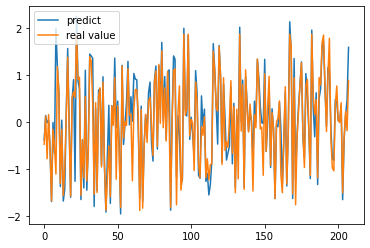

In [ ]:
plt.plot(model.predict(x_test),label='predict')
plt.plot(y_test, label='real value')
#plt.plot(model.predict(x_test)-y_test)
plt.xlim(0,50)
plt.legend()
plt.show